<a href="https://colab.research.google.com/github/guilhermelaviola/BIArchitectureAndBigData/blob/main/Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytical CRM**
Analytical CRM refers to the use of advanced data analysis techniques and tools to understand customer behavior, predict their needs, and improve the relationship between company and consumer. This analytical approach is essential for transforming large volumes of data into valuable insights that can be used to create more effective and personalized strategies.

In [1]:
pip install squarify

In [2]:
# Importing all the necessary libraries:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

pd.set_option('display.max_columns', None)

In [3]:
# Downloading the dataset:
!gdown 13KobAmR6rdEcWTUrd7rlZ6JYhe2TfDqC

Downloading...
From: https://drive.google.com/uc?id=13KobAmR6rdEcWTUrd7rlZ6JYhe2TfDqC
To: /content/Customer Segmentation.csv
100% 13.5M/13.5M [00:00<00:00, 145MB/s]


In [4]:
# Importing and displaying the dataset:
url = 'https://raw.githubusercontent.com/Jey-krishna/Customer-segmentation/refs/heads/main/customer_segmentation_data.csv'
df = pd.read_csv(url)
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


<Axes: >

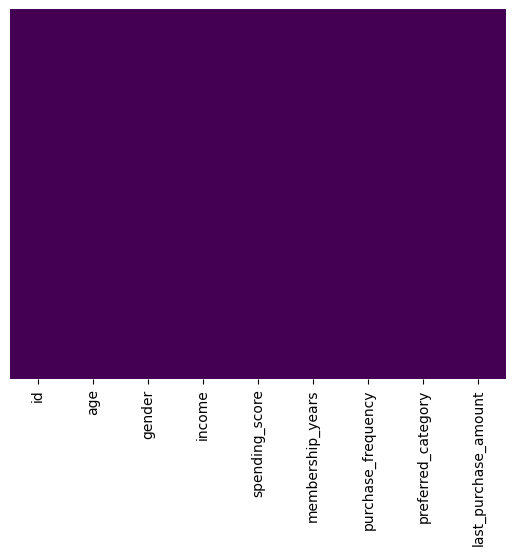

In [5]:
# Plotting heatmap:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

In [6]:
df.nunique()

,0
id,1000
age,52
gender,3
income,996
spending_score,100
membership_years,10
purchase_frequency,50
preferred_category,5
last_purchase_amount,994


Text(0, 0.5, 'Category')

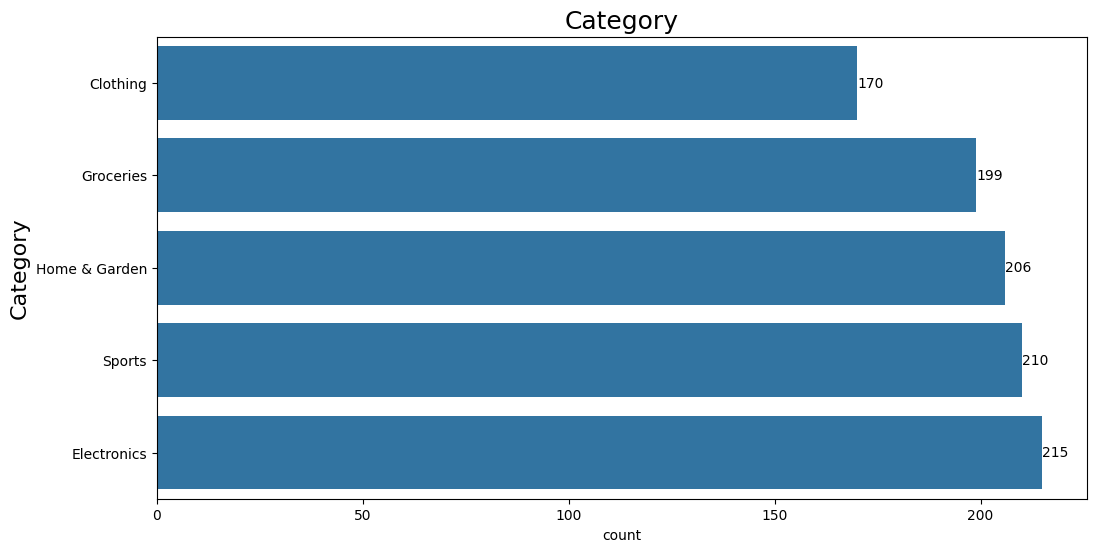

In [7]:
# Plotting bar chart with departments:
plt.figure(figsize=(12, 6))
department = df['preferred_category']
ax=sns.countplot(y= department ,data =df,orient='h',order=department.value_counts().sort_values().index)
plt.title('Category', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('Category', fontsize=16)

Text(0, 0.5, 'Gender')

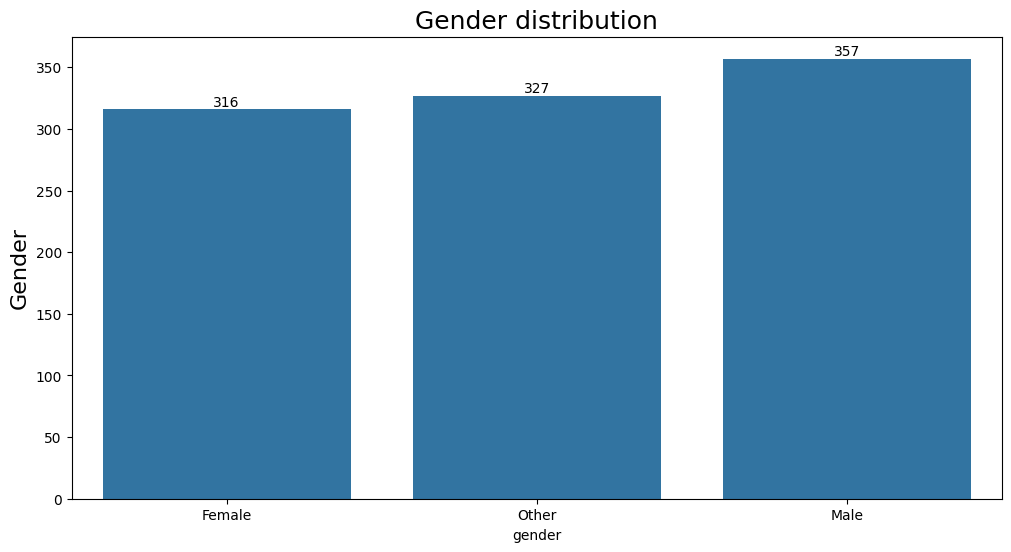

In [8]:
# Plotting bar chart with gender distribution:
plt.figure(figsize=(12, 6))
sex = df['gender']
ax=sns.countplot(x= sex ,data =df,orient='v',order=sex.value_counts().sort_values().index)
plt.title('Gender distribution', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('Gender', fontsize=16)

Text(0, 0.5, 'Region')

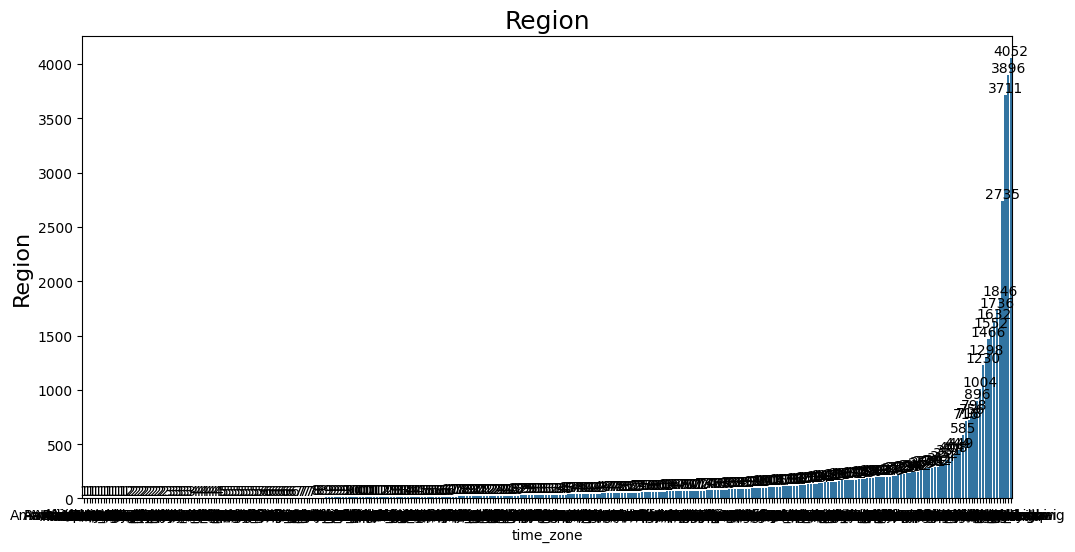

In [ ]:
# Plotting a bar chart with region:
plt.figure(figsize=(12, 6))
continent = df['time_zone']
ax=sns.countplot(x= continent ,data =df,orient='v',order=continent.value_counts().sort_values().index)
plt.title('Region', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('Region', fontsize=16)

In [ ]:
# Splitting string on every '/':
df['time_zone'] = df['time_zone'].str.split('/').str[0]

# **Segmentation**

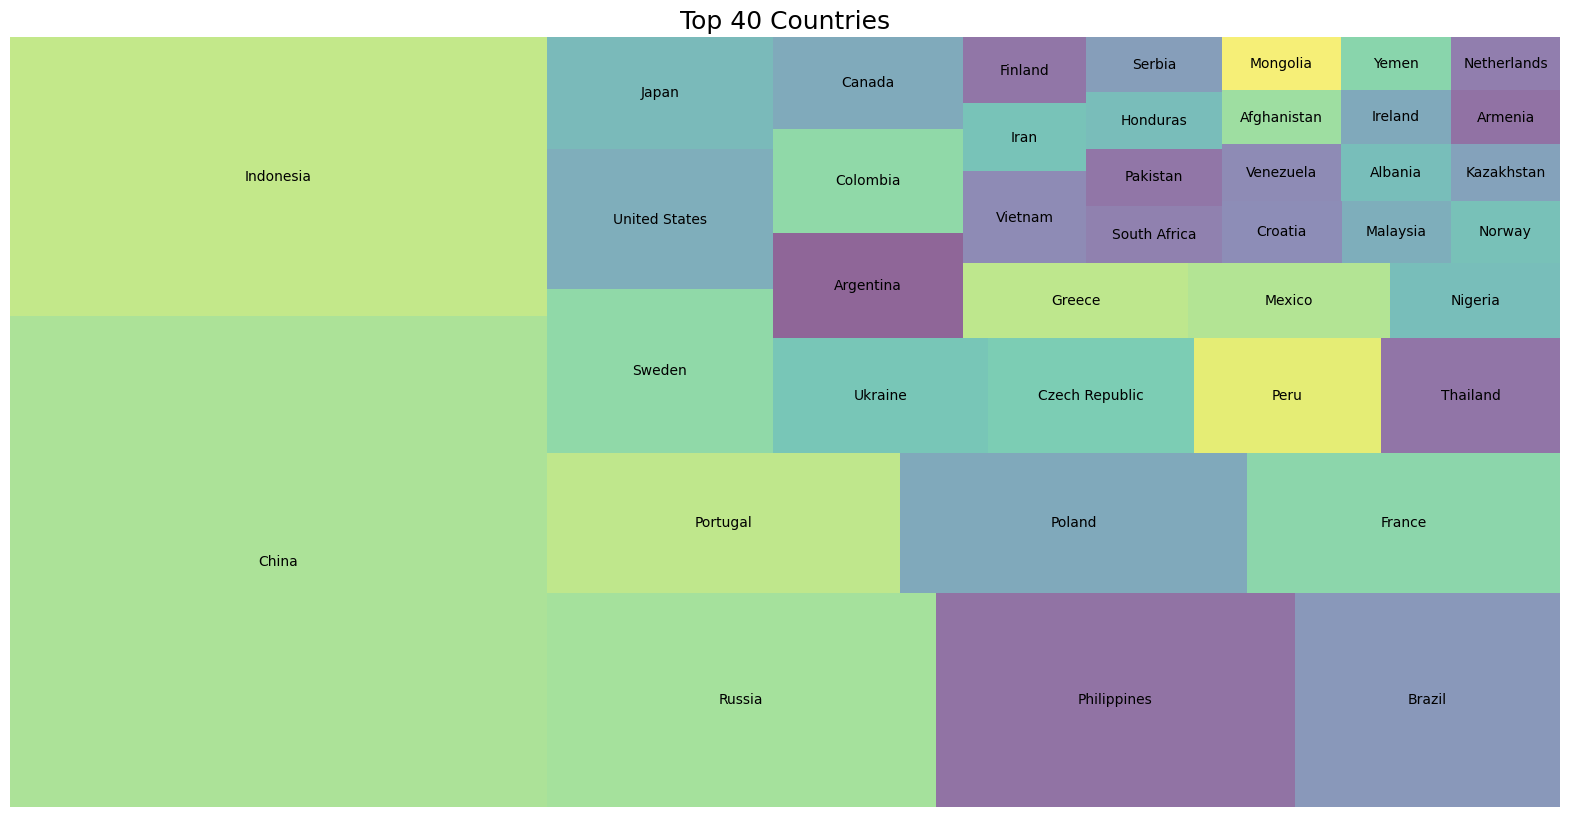

In [ ]:
# Plotting a Treemap with top 40 countries:
plt.figure(figsize=(20, 10))
sizes = df['country'].value_counts()[:40]
labels = sizes.index.tolist()
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Top 40 Countries', fontsize=18)
plt.axis('off')
plt.show()

In [ ]:
# Filtering the dataset with instances related to Brazil:
brazil = df[df['country'] == 'Brazil']
brazil

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,phone,street_address,street_name,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
5,Cleveland,Lindegard,Mr,Female,clindegard5@ezinearticles.com,Tarauacá,Brazil,BR,-8.213232,-71.382437,179-490-8666,2 Tomscot Court,Oak,6390,Center,America,Shuffletag,Sales,Mechanical Systems Engineer,Portuguese,Universidade Vale do Rio Doce,Occupational Therapists,221.193.207.249
31,Margret,Thridgould,Ms,Female,mthridgouldv@ucla.edu,Cordeirópolis,Brazil,BR,-22.493938,-47.429433,513-939-8601,29 Milwaukee Center,3rd,3532,Terrace,America,Vipe,Training,Environmental Tech,Nepali,Universidade Santa Cecília dos Bandeirantes,NCP,12.51.107.204
33,Molli,Sherwen,Rev,Male,msherwenx@nymag.com,Araçuaí,Brazil,BR,-16.848817,-42.063300,629-238-5782,95 Waxwing Lane,Burning Wood,92868,Point,America,Skinder,Product Management,Chief Design Engineer,Tok Pisin,Universidade do Rio de Janeiro,OEM negotiations,1.237.183.159
40,Devin,Wethers,Mrs,Genderfluid,dwethers14@youku.com,Parintins,Brazil,BR,-2.624236,-56.734617,430-307-2420,1 Laurel Lane,Waubesa,20782,Terrace,America,Gabtype,Product Management,Analyst Programmer,Bengali,Universidade Católica Dom Bosco,High Rise,230.18.222.23
58,Nobie,Bearman,Rev,Male,nbearman1m@forbes.com,Caçapava do Sul,Brazil,BR,-30.514844,-53.483238,859-109-1085,48 Hansons Road,Banding,670,Junction,America,Skinder,Product Management,Biostatistician III,Guaraní,Universidade do Grande Rio,CFTC,92.0.50.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50806,Morrie,Ovendon,Dr,Female,movendonme@booking.com,Caçapava do Sul,Brazil,BR,-30.514844,-53.483238,988-472-0749,59711 Walton Way,Larry,937,Drive,America,Edgewire,Business Development,Automation Specialist III,Kazakh,Centro Universitário Newton Paiva,Atomic Absorption,253.154.245.68
50841,Raphaela,Shadfourth,Dr,Male,rshadfourthnd@yandex.ru,Amaraji,Brazil,BR,-8.374877,-35.455134,327-677-6953,43 Mesta Circle,Mockingbird,578,Street,America,Thoughtstorm,Legal,Accountant II,Quechua,Universidade Federal da Bahia,RVs,15.107.108.130
50846,Gilberta,Gashion,Ms,Female,ggashionni@soup.io,Oliveira,Brazil,BR,-20.698430,-44.825678,694-373-0464,67 Warrior Point,Brentwood,8351,Place,America,Tagopia,Marketing,Business Systems Development Analyst,Montenegrin,Faculdades Integradas Curitiba,IBM Websphere Commerce,103.211.129.63
50908,Rem,Bourley,Ms,Female,rbourleyp8@flavors.me,Arapiraca,Brazil,BR,-9.755588,-36.663958,594-821-9095,68 Stuart Avenue,Stuart,66631,Pass,America,Eare,Business Development,Cost Accountant,Burmese,Universidade Estadual de Feira de Santana,Market Planning,152.191.73.52


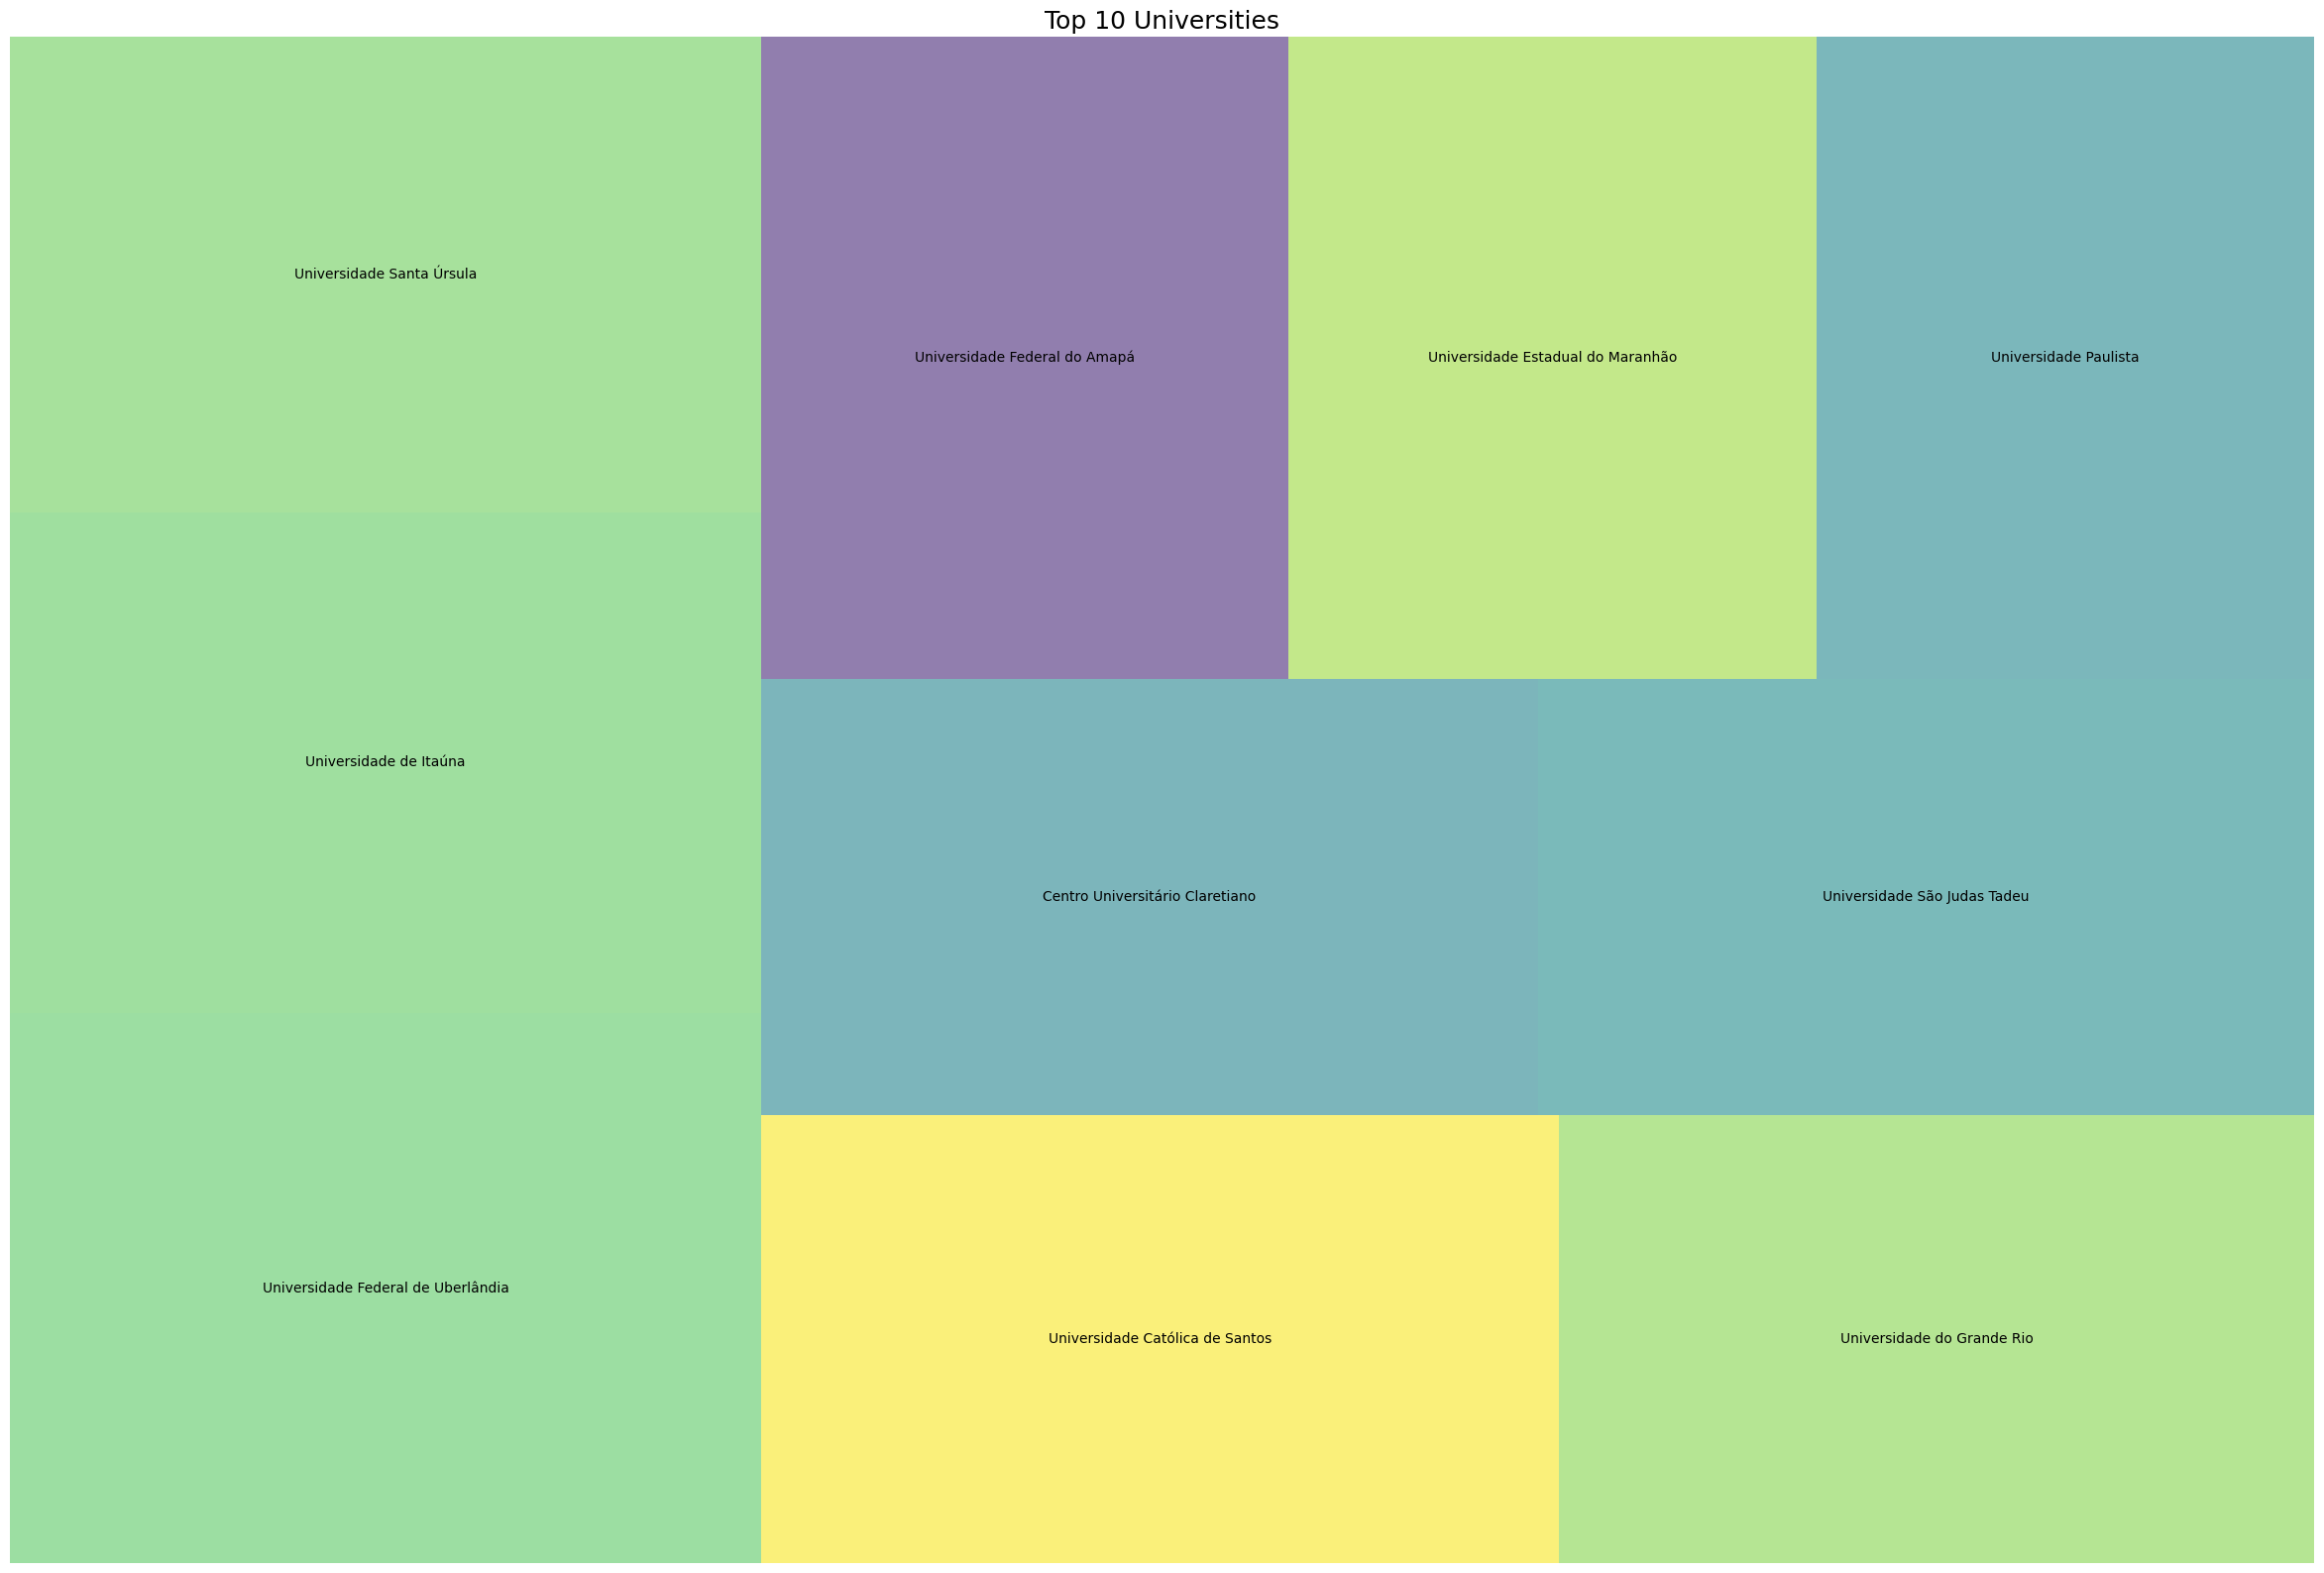

In [ ]:
# Plotting a Treemap with top 40 universities:
plt.figure(figsize=(30, 20))
sizes = brazil['university'].value_counts()[:10]
labels = sizes.index.tolist()
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Top 10 Universities', fontsize=18)
plt.axis('off')
plt.show()